<a href="https://colab.research.google.com/github/Daeijavad/Deep-Learning/blob/main/HW5_ConvolutionalNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Convolutional Neural Networks

Welcome to HomeWork 5 of the course! In this notebook, you will:

- Implement a CNN model from the scratch for image classification.
- Use a pretrained model and Transfer learning to solve above classification problem.

As usual, we will start by loading the packages.

In [ ]:
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)
# Feel free to add pakages depending of your selected frame work. 

Then, we load the dataset:

In [ ]:
def load_dataset():
    tf = tarfile.open("/content/drive/My Drive/Colab Notebooks/dataset.tar.gz")
    tf.extractall()
    
    train_dataset = pd.read_csv('data/train.csv')
    test_dataset = pd.read_csv('data/test.csv')
    
    X_train = convert_x_data(train_dataset.values[:, 1])
    X_test = convert_x_data(test_dataset.values[:, 1])
    
    Y_train = train_dataset.values[:, 0]
    Y_test = test_dataset.values[:, 0]
        
    X_train = X_train.reshape((X_train.shape[0], 1, 48, 48))
    X_test = X_test.reshape((X_test.shape[0], 1, 48, 48))
    
    return X_train, Y_train, X_test, Y_test

def convert_x_data(X_data) :
    x = np.zeros((X_data.shape[0], 48*48))
    for ix in range(x.shape[0]):
        p = X_data[ix].split(' ')
        for iy in range(x.shape[1]):
            x[ix, iy] = int(p[iy])
    return x

Run the next cell to load the dataset you are going to use.

In [ ]:
# Loading the data
X_train, Y_train, X_test, Y_test = load_dataset()

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

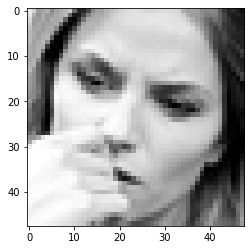

In [ ]:
ix = 2;
plt.figure(ix)
plt.imshow(X_train[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

From now implemnt your model. After that use transfer learning.
Please add cells and explain yours developing steps and your results.

> in this part of code we reshape the dataset and then we normalize them in order to have variance equal to 1 and mean equal to 0

## IMPORTANT: for testing the new data it is needed to normalize the new dataset

> in the two last line we change the Y_test and Y_train into categorical type

In [ ]:
from keras.utils import to_categorical

X_train = X_train.reshape((28709, 48, 48,1))
X_test = X_test.reshape((3588, 48, 48,1))

_mean = np.mean(X_train, axis=0)
_var  = np.std(X_train, axis=0)

X_train = X_train - _mean
X_train = X_train / _var

X_test = X_test - _mean
X_test = X_test / _var

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

Using TensorFlow backend.


# model architecture:
> in this architecture we used 4 layer with same behavier(explained below) and after that there is 3 fully connected layers at the end there is a softmax layer


> in the first 4 layers we used 2 Conv2D layer after each a BatchNormalization layer and after that MaxPooling and a Dropout layer. we used 3*3 kernels

> the last three layers we used Conv1*1 instead of fully connected

> all this layers have been random initialized

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

filterNum = 64

model = Sequential()

model.add(Conv2D(filterNum, kernel_size=(3, 3), kernel_initializer='random_uniform', activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filterNum, kernel_size=(3, 3), kernel_initializer='random_uniform', activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(2*filterNum, kernel_size=(3, 3), kernel_initializer='random_uniform', activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*filterNum, kernel_size=(3, 3), kernel_initializer='random_uniform', activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(2*2*filterNum, kernel_size=(3, 3), kernel_initializer='random_uniform', activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*filterNum, kernel_size=(3, 3), kernel_initializer='random_uniform', activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(2*2*2*filterNum, kernel_size=(3, 3), kernel_initializer='random_uniform', activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*filterNum, kernel_size=(3, 3), kernel_initializer='random_uniform', activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))


model.add(Conv2D(2*2*2*filterNum, kernel_size=(1, 1), kernel_initializer='random_uniform', activation='relu', padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(2*2*filterNum, kernel_size=(1, 1), kernel_initializer='random_uniform', activation='relu', padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(2*filterNum, kernel_size=(1, 1), kernel_initializer='random_uniform', activation='relu', padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(7, activation='softmax'))

> optimizer adam and categorical cross entropy loss function


In [ ]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

# model visualization

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)      

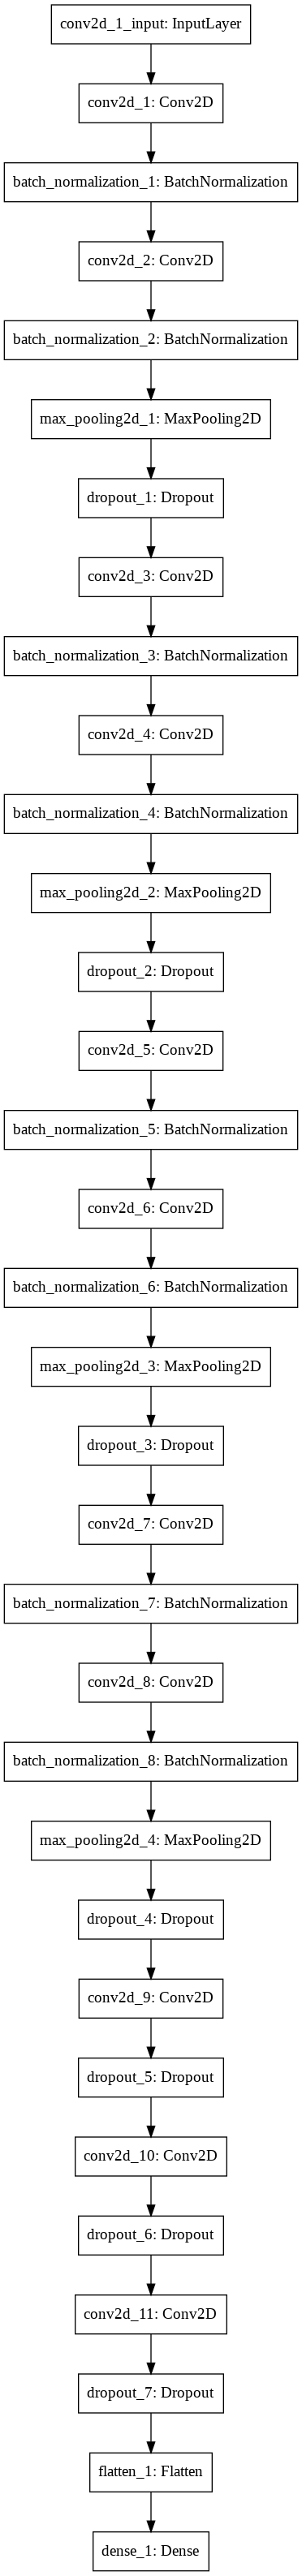

In [ ]:
from keras.utils import plot_model
plot_model(model)

# train model and test it with validation data

In [ ]:
history = model.fit(X_train, Y_train,
          batch_size=64,
          epochs=15,
          verbose=1,
          validation_data=(X_test, Y_test),
          shuffle=True,
          use_multiprocessing=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 28709 samples, validate on 3588 samples
Epoch 1/50
28709/28709 [==============================] - 34s 1ms/step - loss: 1.7391 - acc: 0.2899 - val_loss: 1.4978 - val_acc: 0.4169
Epoch 2/50
28709/28709 [==============================] - 28s 967us/step - loss: 1.4376 - acc: 0.4393 - val_loss: 1.3431 - val_acc: 0.4691
Epoch 3/50
28709/28709 [==============================] - 28s 959us/step - loss: 1.3032 - acc: 0.5044 - val_loss: 1.2146 - val_acc: 0.5415
Epoch 4/50
28709/28709 [==============================] - 27s 952us/step - loss: 1.2230 - acc: 0.5419 - val_loss: 1.1472 - val_acc: 0.5686
Epoch 5/50
28709/28709 [==============================] - 27s 956us/step - loss: 1.1669 - acc: 0.5665 - val_loss: 1.1207 - val_acc: 0.5683
Epoch 6/50
28709/28709 [==============================] - 27s 957us/step - loss: 1.1179 - acc: 0.5825 - val_loss: 1.1055 - val_acc: 0.5822
Epoch 7/50
28709/28709 

# plots:
> https://keras.io/visualization/

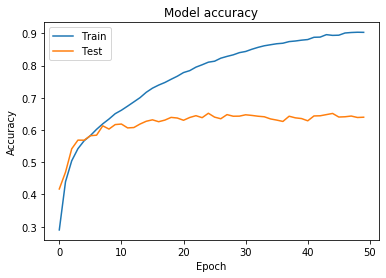

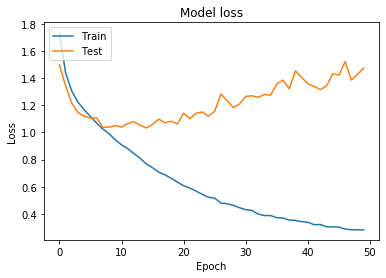

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

> as we can see the more the traning epochs the worse the loss. in the other word as we train more the model overfits and gets bad result in the validation set. so it's better to terminate the fitting process after ***11*** epochs
#### I changed the number of training epochs from ***50*** to ***15***, so the next time it trains it will learn only ***15*** epochs for training


# for testing import the test dataset in the box below:

In [ ]:
# import test data here

In [ ]:
Xtest = Xtest.reshape((Xtest.shape[0], 1, 48, 48))
Ytest = to_categorical(Ytest)

Xtest = Xtest - _mean
Xtest = Xtest / _var

In [ ]:
model.evaluate(Xtest,Ytest, use_multiprocessing=True, batch_size=64, verbose = 1)